In [93]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"


In [94]:
# Read the Clinical Trial Data
ms_drug_data = pd.read_csv(mouse_drug_data_to_load)
ms_drug_data.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [95]:
# Read the Clinical Trial Data
clinical_data = pd.read_csv(clinical_trial_data_to_load)
clinical_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [96]:
# Combine the data into a single dataset
combined_df = pd.merge(ms_drug_data, clinical_data, on= "Mouse ID", how="outer")

# Display the data table for preview
combined_df.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [97]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tm_vol_df = combined_df[["Drug","Timepoint","Tumor Volume (mm3)"]]
gr_df = tm_vol_df.groupby(["Drug","Timepoint"])
gr_df_mean = gr_df.mean()
gr_df_mean

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325
          25                  39.939528
          30                  38.769339
          35                  37.816839
          40                  36.958001
          45                  36.236114
Ceftamin  0                   45.000000
          5                   46.503051
          10                  48.285125
          15                  50.094055
          20                  52.157049
          25                  54.287674
          30                  56.769517
          35                  58.827548
          40                  61.467895
          45                  64.132421
Infubinol 0                   45.000000
          5                   47.062001
          10                  49.403909
          15                  51.296397
          20                  53.197691
          25                  55.715252
          30                  58.299397
          35                  60.742461
          40                  63.162824
          45                  65.755562
...                                 ...
Ramicane  0                   45.000000
          5                   43.944859
          10                  42.531957
          15                  41.495061
          20                  40.238325
          25                  38.974300
          30                  38.703137
          35                  37.451996
          40                  36.574081
          45                  34.955595
Stelasyn  0                   45.000000
          5                   47.527452
          10                  49.463844
          15                  51.529409
          20                  54.067395
          25                  56.166123
          30                  59.826738
          35                  62.440699
          40                  65.356386
          45                  68.438310
Zoniferol 0                   45.000000
          5                   46.851818
          10                  48.689881
          15                  50.779059
          20                  53.170334
          25                  55.432935
          30                  57.713531
          35                  60.089372
          40                  62.916692
          45                  65.960888

[100 rows x 1 columns]

In [98]:
# Convert to DataFrame
mean_gr_df = gr_df_mean.reset_index()

# Preview DataFrame
mean_gr_df.head(20)

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [99]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
gr_df = tm_vol_df.groupby(["Drug","Timepoint"])
gr_df_sem = gr_df.sem()
gr_df_sem

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731
          25                   0.881642
          30                   0.934460
          35                   1.052241
          40                   1.223608
          45                   1.223977
Ceftamin  0                    0.000000
          5                    0.164505
          10                   0.236144
          15                   0.332053
          20                   0.359482
          25                   0.439356
          30                   0.490620
          35                   0.692248
          40                   0.708505
          45                   0.902358
Infubinol 0                    0.000000
          5                    0.235102
          10                   0.282346
          15                   0.357705
          20                   0.476210
          25                   0.550315
          30                   0.631061
          35                   0.984155
          40                   1.055220
          45                   1.144427
...                                 ...
Ramicane  0                    0.000000
          5                    0.482955
          10                   0.720225
          15                   0.770432
          20                   0.786199
          25                   0.746991
          30                   0.864906
          35                   0.967433
          40                   1.128445
          45                   1.226805
Stelasyn  0                    0.000000
          5                    0.239862
          10                   0.433678
          15                   0.493261
          20                   0.621889
          25                   0.741922
          30                   0.899548
          35                   1.003186
          40                   1.410435
          45                   1.576556
Zoniferol 0                    0.000000
          5                    0.188950
          10                   0.263949
          15                   0.370544
          20                   0.533182
          25                   0.602513
          30                   0.800043
          35                   0.881426
          40                   0.998515
          45                   1.003576

[100 rows x 1 columns]

In [100]:
# Convert to DataFrame
sem_gr_df = gr_df_sem.reset_index()

# Preview DataFrame
sem_gr_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [101]:
# Minor Data Munging to Re-Format the Data Frames
pivot_mean_vol = mean_gr_df.pivot(index="Timepoint", columns="Drug",values="Tumor Volume (mm3)")
# Preview that Reformatting worked
pivot_mean_vol_df = pivot_mean_vol.reset_index()
pivot_mean_vol_df.head()

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
1,5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
2,10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
3,15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
4,20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [114]:
# Minor Data Munging to Re-Format the Data Frames
pivot_sem_vol = sem_gr_df.pivot(index="Timepoint", columns="Drug",values="Tumor Volume (mm3)")
# Preview that Reformatting worked
pivot_sem_vol_df = pivot_sem_vol.reset_index()
pivot_sem_vol_df.head()

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
2,10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
3,15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
4,20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


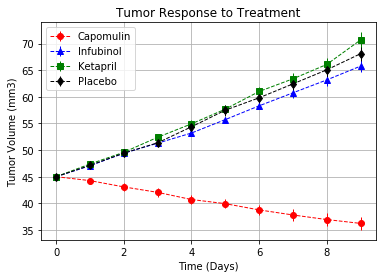

In [169]:
# Generate the Plot (with Error Bars)

plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")

plt.grid()

#Tumorline = plt.plot(mean_gr_df["Timepoint"], mean_gr_df['Tumor Volume (mm3)'])
plt.errorbar(pivot_mean_vol_df.index, pivot_mean_vol_df['Capomulin'], yerr=pivot_sem_vol_df['Capomulin'],color="R",lw=1, ls="--", marker="o",label="Capomulin")
plt.errorbar(pivot_mean_vol_df.index, pivot_mean_vol_df['Infubinol'], yerr=pivot_sem_vol_df['Infubinol'],color="B",lw=1, ls="--", marker="^",label="Infubinol")
plt.errorbar(pivot_mean_vol_df.index, pivot_mean_vol_df['Ketapril'], yerr=pivot_sem_vol_df['Ketapril'],color="green",lw=1, ls="--", marker="s",label="Ketapril")
plt.errorbar(pivot_mean_vol_df.index, pivot_mean_vol_df['Placebo'], yerr=pivot_sem_vol_df['Placebo'],color="black",lw=1, ls="--", marker="d",label="Placebo")

plt.legend(loc="upper left")

In [170]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [140]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tm_vol_met_df = combined_df[["Drug","Timepoint","Metastatic Sites"]]
gr_met_df = tm_vol_met_df.groupby(["Drug","Timepoint"])
gr_df_met_mean = gr_met_df.mean()
gr_df_met_mean.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [143]:
# Convert to DataFrame
mean_met_df = gr_df_met_mean.reset_index()

# Preview DataFrame
mean_met_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174
5,Capomulin,25,0.818182
6,Capomulin,30,1.090909
7,Capomulin,35,1.181818
8,Capomulin,40,1.380952
9,Capomulin,45,1.476190


In [153]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
gr_met_sem = gr_met_df.sem()
gr_met_sem.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [155]:
# Convert to DataFrame
gr_met_sem_df = gr_met_sem.reset_index()
# Preview DataFrame
gr_met_sem_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [156]:
# Minor Data Munging to Re-Format the Data Frames
pivot_mean_met = mean_met_df.pivot(index="Timepoint", columns="Drug",values="Metastatic Sites")
# Preview that Reformatting worked
pivot_mean_met_df = pivot_mean_met.reset_index()
pivot_mean_met_df.head()

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
2,10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
3,15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
4,20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [157]:
# Minor Data Munging to Re-Format the Data Frames
pivot_gr_met_sem = gr_met_sem_df.pivot(index="Timepoint", columns="Drug",values="Metastatic Sites")
# Preview that Reformatting worked
pivot_gr_met_sem_df = pivot_gr_met_sem.reset_index()
pivot_gr_met_sem_df.head()

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
2,10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
3,15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
4,20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


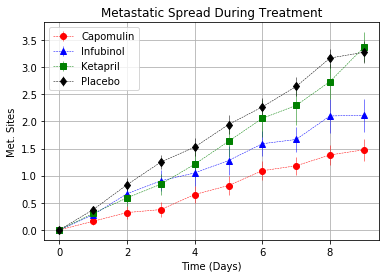

In [166]:
# Generate the Plot (with Error Bars)
plt.title("Metastatic Spread During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Met. Sites")

plt.grid()

#Tumorline = plt.plot(mean_gr_df["Timepoint"], mean_gr_df['Tumor Volume (mm3)'])
plt.errorbar(pivot_mean_met_df.index, pivot_mean_met_df['Capomulin'], yerr=pivot_gr_met_sem_df['Capomulin'],color="R",lw=0.5, ls="--", marker="o", label="Capomulin")
plt.errorbar(pivot_mean_met_df.index, pivot_mean_met_df['Infubinol'], yerr=pivot_gr_met_sem_df['Infubinol'],color="B",lw=0.5, ls="--", marker="^", label="Infubinol")
plt.errorbar(pivot_mean_met_df.index, pivot_mean_met_df['Ketapril'], yerr=pivot_gr_met_sem_df['Ketapril'],color="green",lw=0.5, ls="--", marker="s",label="Ketapril")
plt.errorbar(pivot_mean_met_df.index, pivot_mean_met_df['Placebo'], yerr=pivot_gr_met_sem_df['Capomulin'],color="black",lw=0.5, ls="--", marker="d",label="Placebo")

plt.legend(loc="upper left")
# Save the Figure

# Show the Figure
plt.show()

## Survival Rates

In [ ]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

# Preview DataFrame


,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [ ]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

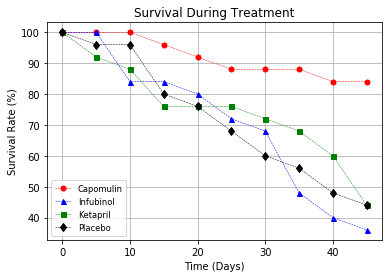

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

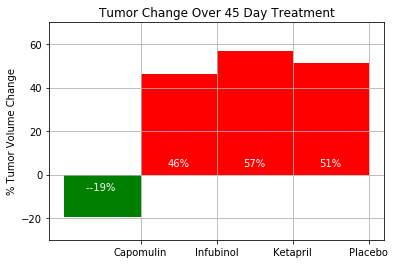